C:\Users\HP\AppData\Local\Temp\ipykernel_9588\4238611144.py:91: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
C:\Users\HP\AppData\Local\Temp\ipykernel_9588\4238611144.py:91: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
C:\Users\HP\AppData\Local\Temp\ipykernel_9588\4238611144.py:91: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_p

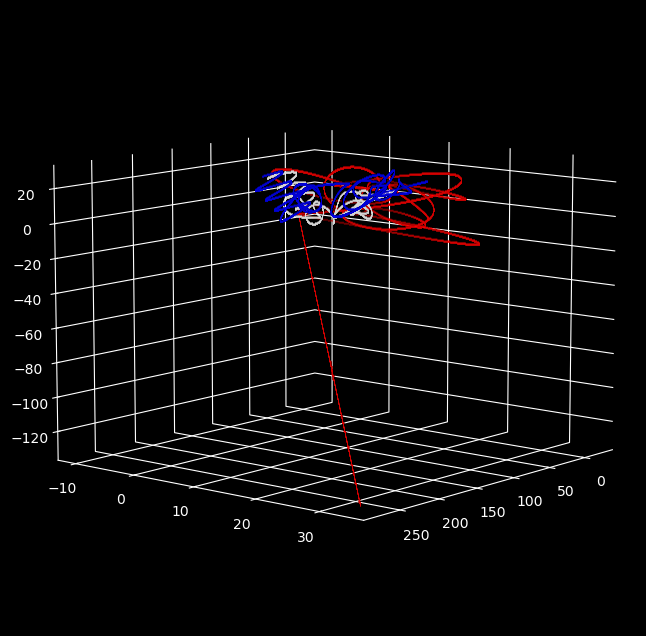

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')

# masses of planets
m_1 = 10
m_2 = 20
m_3 = 30

# starting coordinates for planets
# p1_start = x_1, y_1, z_1
p1_start = np.array([-10, 10, -11])
v1_start = np.array([-3, 0, 0])

# p2_start = x_2, y_2, z_2
p2_start = np.array([0, 0, 0])
v2_start = np.array([0, 0, 0])

# p3_start = x_3, y_3, z_3
p3_start = np.array([-10, 10, 12])
v3_start = np.array([3, 0, 0])

def accelerations(p1, p2, p3):
    """A function to calculate the derivatives of x, y, and z
    given 3 object and their locations according to Newton's laws"""
    
    m_1, m_2, m_3 =  5,20,15
    
    planet_1_dv = -9.8 * m_2 * (p1 - p2)/(np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)**3) - \
                   9.8 * m_3 * (p1 - p3)/(np.sqrt((p1[0] - p3[0])**2 + (p1[1] - p3[1])**2 + (p1[2] - p3[2])**2)**3)
    
    planet_2_dv = -9.8 * m_3 * (p2 - p3)/(np.sqrt((p2[0] - p3[0])**2 + (p2[1] - p3[1])**2 + (p2[2] - p3[2])**2)**3) - \
                   9.8 * m_1 * (p2 - p1)/(np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2 + (p2[2] - p1[2])**2)**3)
    
    planet_3_dv = -9.8 * m_1 * (p3 - p1)/(np.sqrt((p3[0] - p1[0])**2 + (p3[1] - p1[1])**2 + (p3[2] - p1[2])**2)**3) - \
                   9.8 * m_2 * (p3 - p2)/(np.sqrt((p3[0] - p2[0])**2 + (p3[1] - p2[1])**2 + (p3[2] - p2[2])**2)**3)

    return planet_1_dv, planet_2_dv, planet_3_dv


# parameters
delta_t = 0.001
steps = 200000

# initialize trajectory array
p1 = np.array([[0.,0.,0.] for i in range(steps)])
v1 = np.array([[0.,0.,0.] for i in range(steps)])

p2 = np.array([[0.,0.,0.] for j in range(steps)])
v2 = np.array([[0.,0.,0.] for j in range(steps)])

p3 = np.array([[0.,0.,0.] for k in range(steps)])
v3 = np.array([[0.,0.,0.] for k in range(steps)])

# starting point and velocity
p1[0], p2[0], p3[0] = p1_start, p2_start, p3_start

v1[0], v2[0], v3[0] = v1_start, v2_start, v3_start

# evolution of the system
for i in range(steps-1):
    # calculate derivatives
    dv1, dv2, dv3 = accelerations(p1[i], p2[i], p3[i])
    
    v1[i + 1] = v1[i] + dv1 * delta_t
    v2[i + 1] = v2[i] + dv2 * delta_t
    v3[i + 1] = v3[i] + dv3 * delta_t

    p1[i + 1] = p1[i] + v1[i] * delta_t
    p2[i + 1] = p2[i] + v2[i] * delta_t
    p3[i + 1] = p3[i] + v3[i] * delta_t
    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('black')

plt.plot([i[0] for i in p1], [j[1] for j in p1], [k[2] for k in p1] , '^', color='red', lw = 0.05, markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p2], [j[1] for j in p2], [k[2] for k in p2] , '^', color='white', lw = 0.05, markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p3], [j[1] for j in p3], [k[2] for k in p3] , '^', color='blue', lw = 0.05, markersize = 0.01, alpha=0.5)

plt.axis('on')

# optional: use if reference axes skeleton is desired,
# ie plt.axis is set to 'on'
#ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
three_body_image = 'three_body_trajectory.png'
ax.view_init(elev = 10, azim = 40)
plt.savefig('{}'.format(three_body_image), dpi=300)
# make panes have the same color as the background
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
plt.show()
plt.close()